# Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


 # **Load training and test data**

In [2]:

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.info()
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Exploratory Data Analysis

In [34]:
train.shape

(1460, 81)

In [35]:
test.shape

(1459, 80)

**Check for missing values**

In [3]:
miss_train = train.isnull().sum() 
miss_test = test.isnull().sum()
print("miss train data ")
miss_train


miss train data 


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
print("miss test data")
miss_test

miss test data


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

**Print missing value statistics**

In [5]:
print("Train missing values:")
print(miss_train[miss_train > 0]) 
print("Test missing values:")
print(miss_test[miss_test > 0])

Train missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Test missing values:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1

**Handle missing values**

In [7]:

train_clean = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
test_clean = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

# Define columns and methods for filling missing values
fill_values = {
    'LotFrontage': 'mean',  
    'GarageYrBlt': 'mean',  
    'MasVnrArea': 'mean',   
    'GarageCond': 'mode',  
    'GarageType': 'mode',   
    'GarageFinish': 'mode', 
    'GarageQual': 'mode',   
    'BsmtFinType2': 'mode', 
    'BsmtExposure': 'mode',  
    'BsmtFinType1': 'mode', 
    'BsmtCond': 'mode',     
    'BsmtQual': 'mode',     
    'MasVnrType': 'mode',   
    'Electrical': 'mode',   
    'MSZoning': 'mode',     
    'Utilities': 'mode',    
    'Exterior1st': 'mode',
    'Exterior2nd': 'mode',  
    'BsmtFinSF1': 'median', 
    'BsmtFinSF2': 'median',  
    'BsmtUnfSF': 'median',   
    'TotalBsmtSF': 'median', 
    'BsmtFullBath': 'median', 
    'BsmtHalfBath': 'median', 
    'KitchenQual': 'mode',   
    'Functional': 'mode',    
    'GarageCars': 'median',  
    'GarageArea': 'median',  
    'SaleType': 'mode' 
}

# Fill missing values
for col, method in fill_values.items():
    if method == 'mean':
        train_clean[col] = train_clean[col].fillna(train_clean[col].mean())  
        test_clean[col] = test_clean[col].fillna(test_clean[col].mean())   
    elif method == 'median':
        train_clean[col] = train_clean[col].fillna(train_clean[col].median())
        test_clean[col] = test_clean[col].fillna(test_clean[col].median())  
    elif method == 'mode':
        train_clean[col] = train_clean[col].fillna(train_clean[col].mode()[0]) 
        test_clean[col] = test_clean[col].fillna(test_clean[col].mode()[0]) 

# Print missing values statistics after handling
print(train_clean.isnull().sum()[train_clean.isnull().sum() > 0])
print(test_clean.isnull().sum()[test_clean.isnull().sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


# Data vsiualions 

**Plot the distribution of SalePrice**

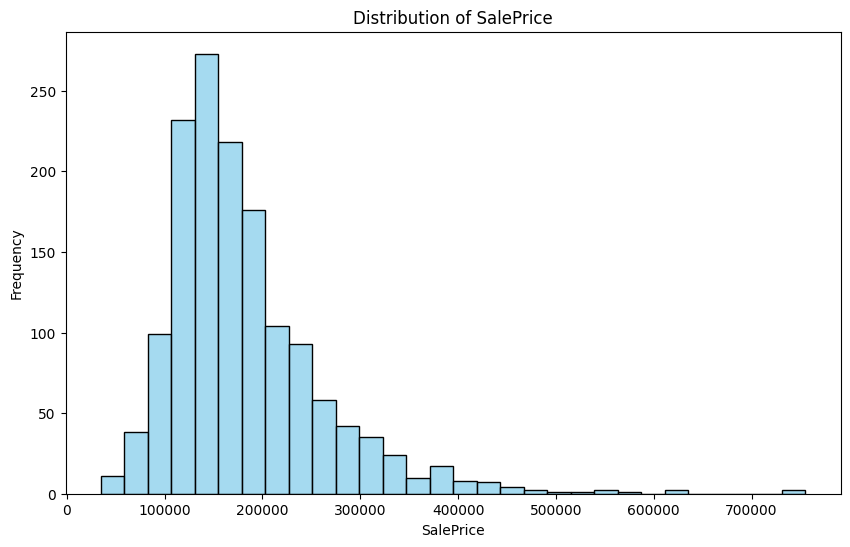

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(train_clean['SalePrice'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

**Note: SalePrice mean value is 100000 to 200000 here**

**Plot the distribution of MSSubClass**

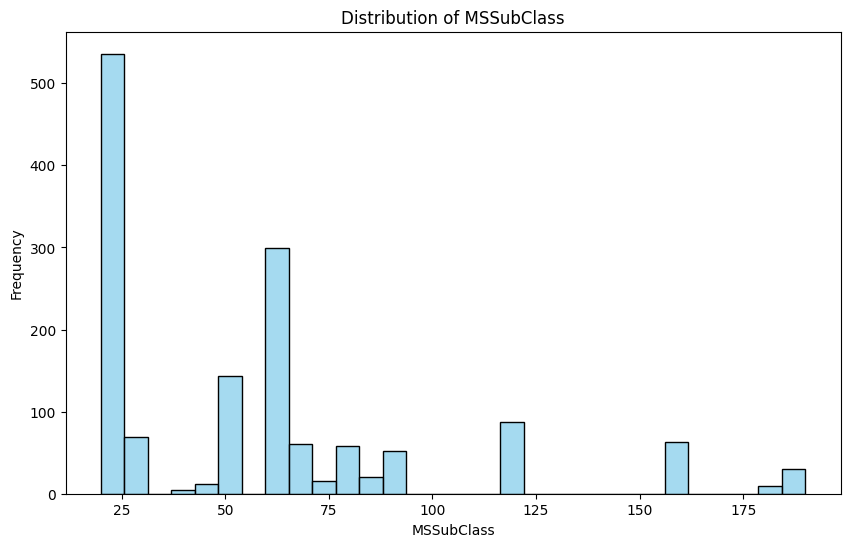

In [10]:

plt.figure(figsize=(10, 6))
sns.histplot(train_clean['MSSubClass'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of MSSubClass')
plt.xlabel('MSSubClass')
plt.ylabel('Frequency')
plt.show()

**Plot a pie chart of MSZoning distribution**

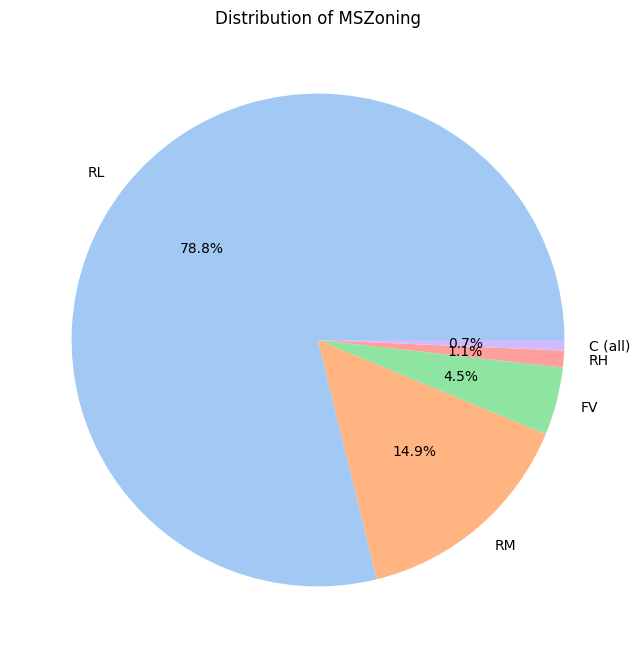

In [11]:

mszoning_counts = train_clean['MSZoning'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(mszoning_counts, labels=mszoning_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of MSZoning')
plt.show()

**Plot a pie chart of BldgType distribution**

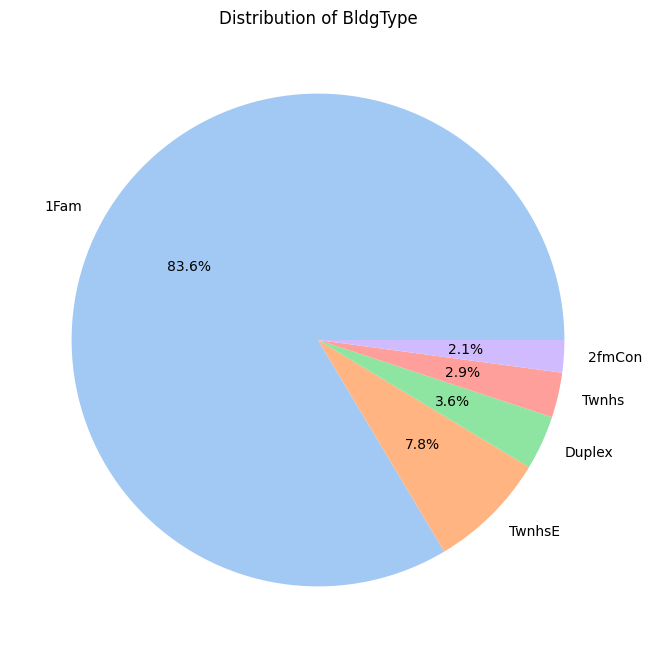

In [12]:

bldgType_counts = train_clean['BldgType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bldgType_counts, labels=bldgType_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of BldgType')
plt.show()

**Plot the distribution of HouseStyle**

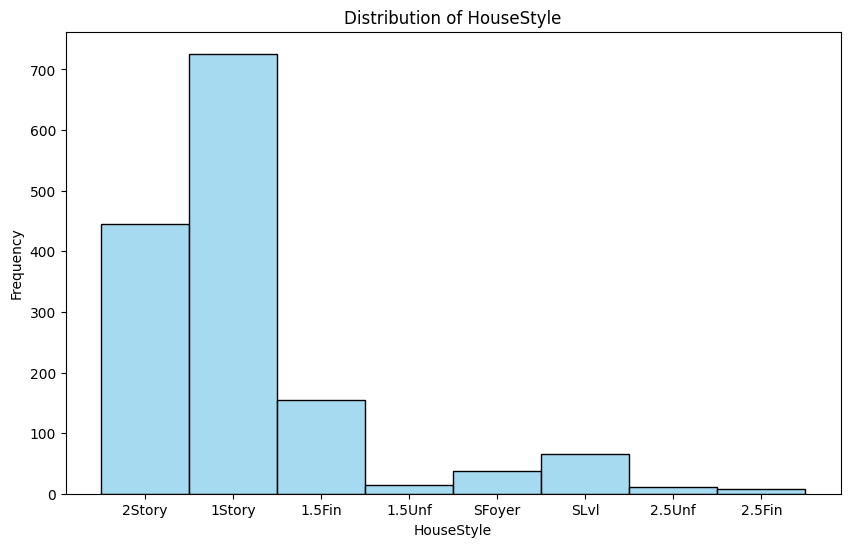

In [13]:

plt.figure(figsize=(10, 6))
sns.histplot(train_clean['HouseStyle'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Frequency')
plt.show()

**Plot the distribution of YearBuilt**


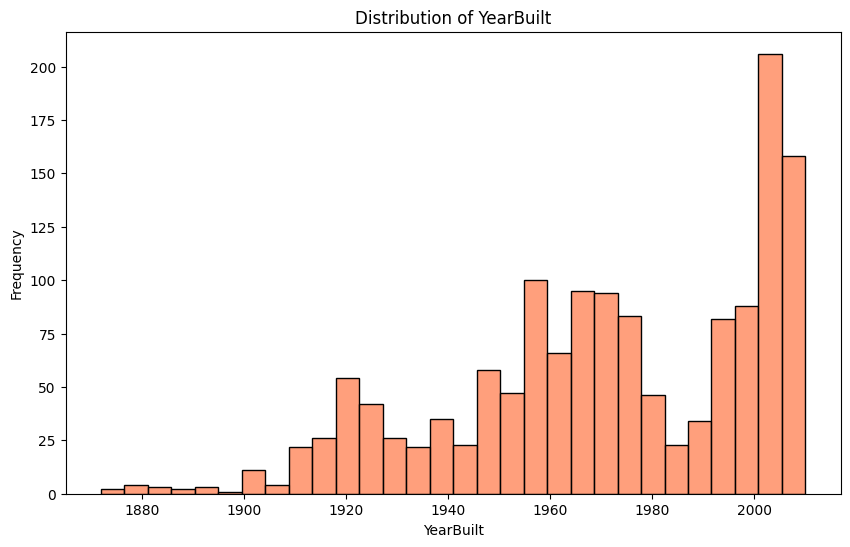

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(train_clean['YearBuilt'], bins=30, kde=False, color='coral')
plt.title('Distribution of YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Frequency')
plt.show()

**Plot the distribution of YearRemodAdd**

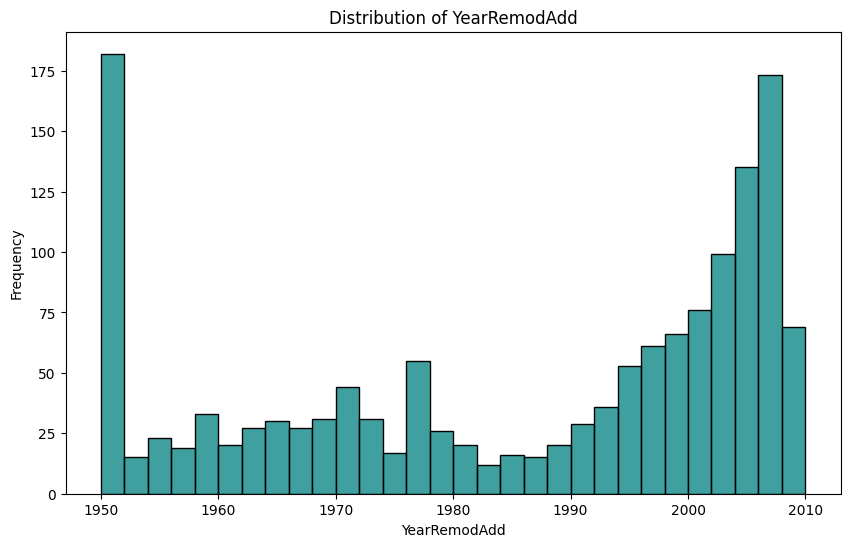

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(train_clean['YearRemodAdd'], bins=30, kde=False, color='teal')
plt.title('Distribution of YearRemodAdd')
plt.xlabel('YearRemodAdd')
plt.ylabel('Frequency')
plt.show()

**Plot a box plot of SalePrice by Neighborhood**

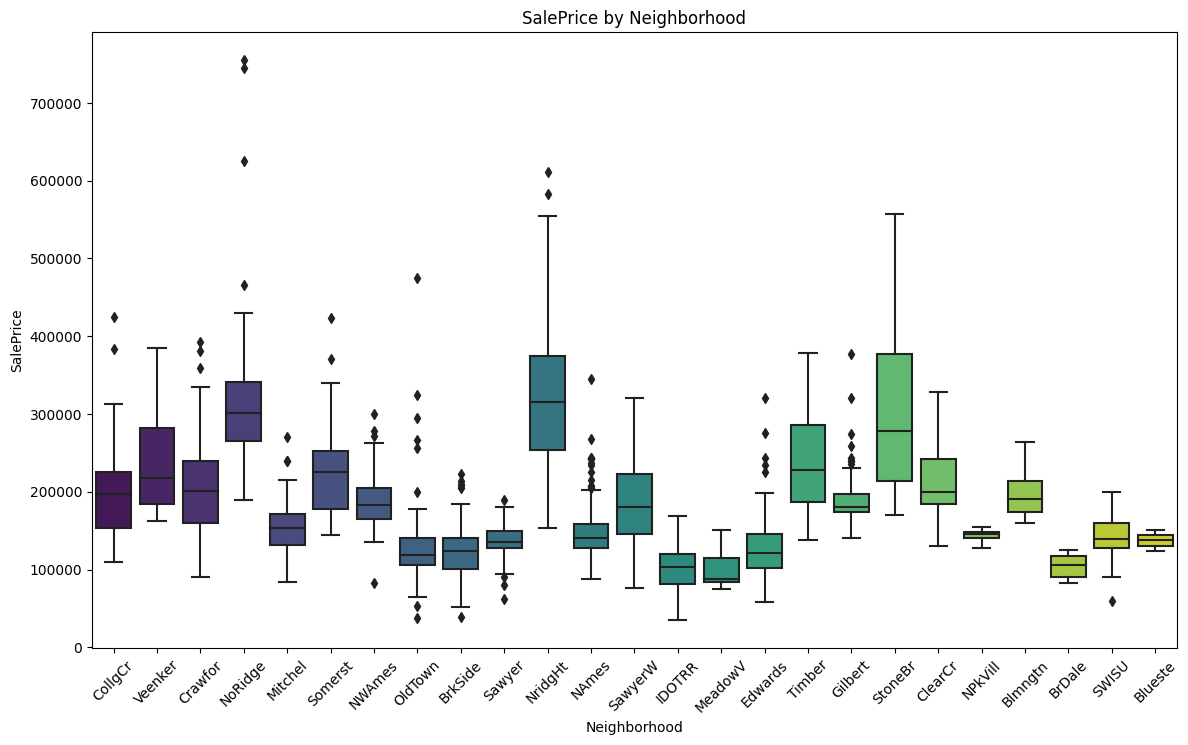

In [19]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_clean, palette='viridis')
plt.title('SalePrice by Neighborhood')
plt.xticks(rotation=45) 
plt.show()

# Model Selection

In [25]:
# Define features and target variable
X = train_clean.drop('SalePrice', axis=1)  # Features
y = train_clean['SalePrice']  # Target variable

In [23]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns  # Numeric features
categorical_features = X.select_dtypes(include=['object']).columns        # Categorical features

# Create preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create overall preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Process numeric features
        ('cat', categorical_transformer, categorical_features)])  # Process categorical features

# Create overall model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])  # Using Linear Regression model





In [26]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 876357768.9034564


In [27]:
# Try a more complex model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])  # Using Random Forest Regressor model
rf_model.fit(X_train, y_train)  # Train Random Forest model
rf_y_pred = rf_model.predict(X_val)  # Make predictions
rf_mse = mean_squared_error(y_val, rf_y_pred)  # Calculate Mean Squared Error
print(f'Random Forest Mean Squared Error: {rf_mse}')



Random Forest Mean Squared Error: 834128960.0146421


In [33]:
# Evaluate Linear Regression model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross-Validation Mean Squared Error: {-cv_scores.mean()}')

# Evaluate Random Forest model using cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest Cross-Validation Mean Squared Error: {-rf_cv_scores.mean()}')

Linear Regression Cross-Validation Mean Squared Error: 1243364047.7996414
Random Forest Cross-Validation Mean Squared Error: 925808216.2885859


Develop by: <br>
Md. Sairul Islam <br>
linkdin : https://www.linkedin.com/in/sairulislam/ <br>
facebook : https://web.facebook.com/sahirul.islam.9<br>
github : https://github.com/sahirul70
